In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [3]:
#!pip install --user scikit-learn

In [4]:
data = pd.read_csv("HousingData.csv")
## Dimension of the dataset
print(np.shape(data))

(506, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
## Summarizing the stats of data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
## Check the missing values
data.isnull().sum()/len(data) * 100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

Here, totel number of missing values are 120.

To handle the missing values, we can do either of the two things
- Remove the rows with missing values
- Adjust some data to the missing value

Removing the rows will shorten potentially shorten the dataset which will indirectly affect the training set, so on smaller datasets this is not a preferrable method

So, here we are going to impute (adjust) the missing values with the median of that respective column (feature).

In [8]:
# Dropping rows with at least 1 null value
new_data_remove_rows = data.dropna(axis=0, how='any')

In [9]:
## Check the missing values
new_data_remove_rows.isnull().sum()/len(data) * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [10]:
print(np.shape(new_data_remove_rows))

(394, 14)


In [11]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
data['CRIM'].fillna(data['CRIM'].median(), inplace=True)
data['ZN'].fillna(data['ZN'].median(), inplace=True)
data['INDUS'].fillna(data['INDUS'].median(), inplace=True)
data['CHAS'].fillna(data['CHAS'].median(), inplace=True)
data['AGE'].fillna(data['AGE'].median(), inplace=True)
data['LSTAT'].fillna(data['LSTAT'].median(), inplace=True)

In [13]:
print(np.shape(data))

(506, 14)


In [14]:
prices = data['MEDV']
features = data.drop('MEDV', axis=1)

In [15]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print("Boston Housing dataset statistics:\n")
print("Minimum house price:", minimum_price)
print("Maximum house price:", maximum_price)
print("Mean house price: {0:.3f}".format(mean_price))
print("Median house price:", median_price)
print("Standard deviation of house price: {0:.3f}".format(std_price))

Boston Housing dataset statistics:

Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


In [16]:
# Correlation is very important in regression problems
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185359,0.392632,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417,-0.383895
ZN,-0.185359,1.000000,-0.507304,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838,0.362292
INDUS,0.392632,-0.507304,1.000000,0.054693,0.738387,-0.377978,0.614248,-0.698621,0.592735,0.716267,0.385366,-0.354840,0.564508,-0.476394
CHAS,-0.055585,-0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279,0.183844
NOX,0.410971,-0.498619,0.738387,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.220045,0.312295,-0.377978,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.343427,-0.535341,0.614248,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366025,0.632428,-0.698621,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.601224,-0.300061,0.592735,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.560469,-0.304385,0.716267,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


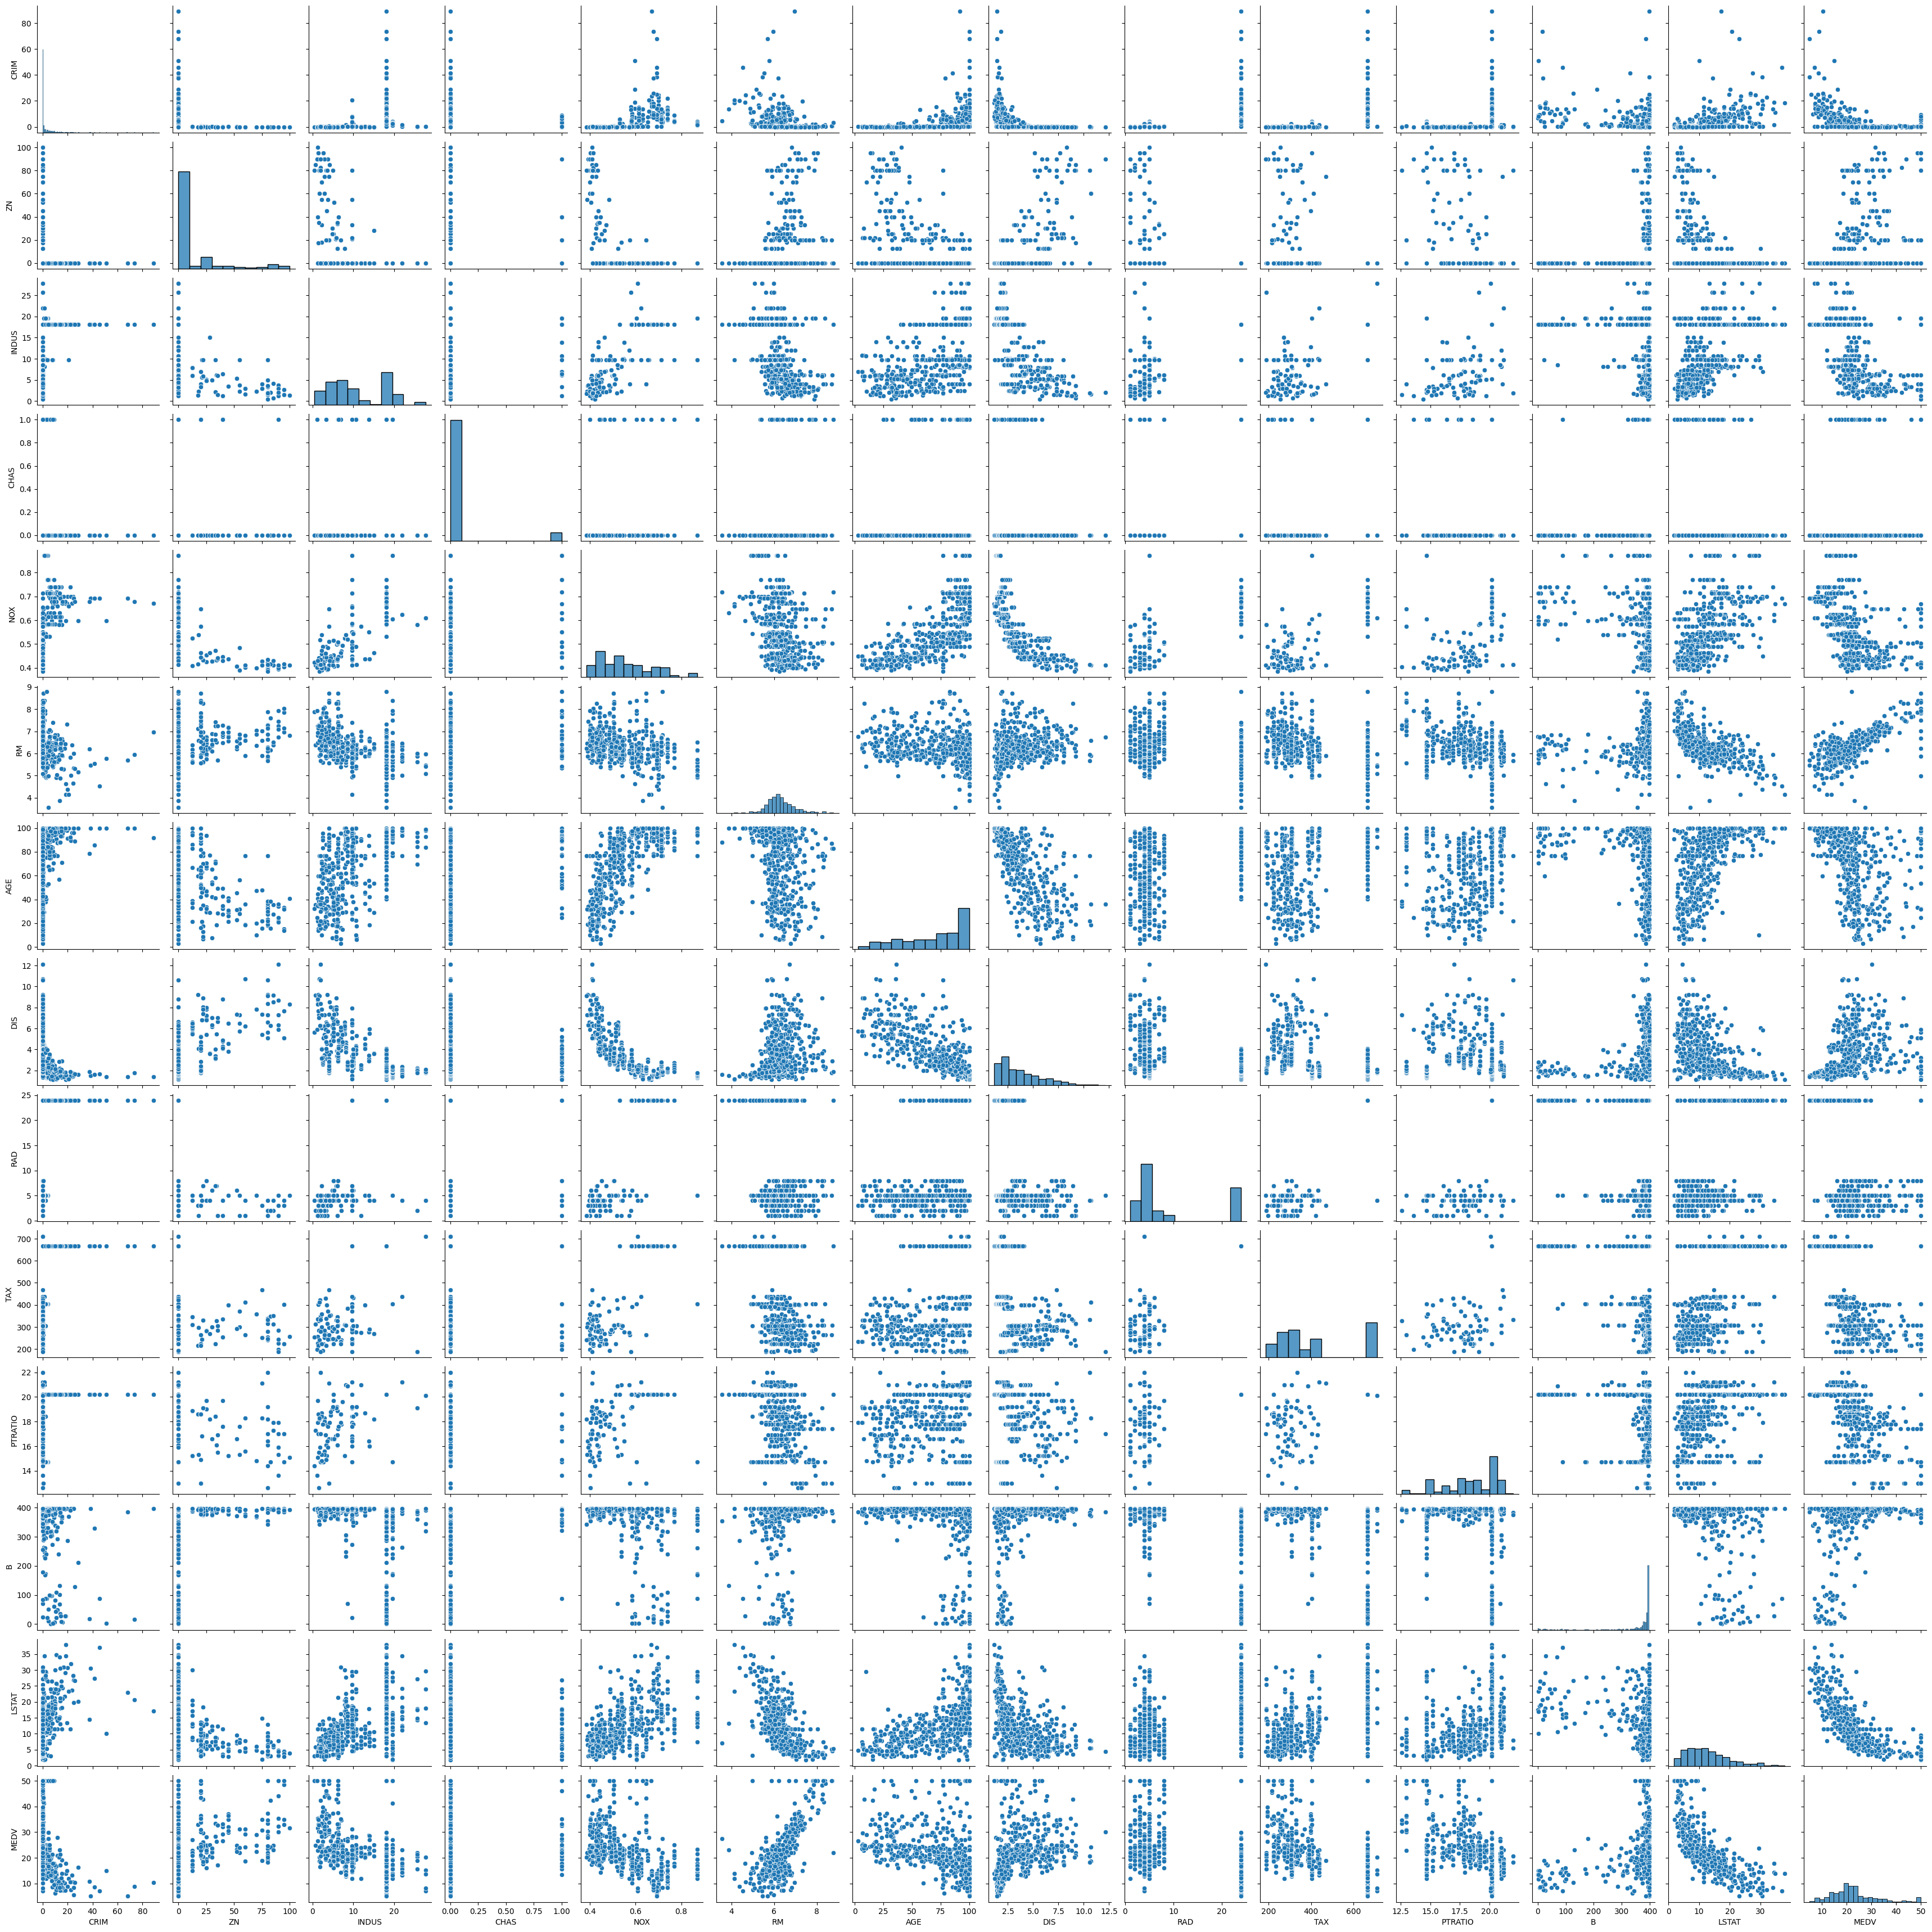

In [17]:
import seaborn as sns
sns.pairplot(data)

Text(0, 0.5, 'Price')

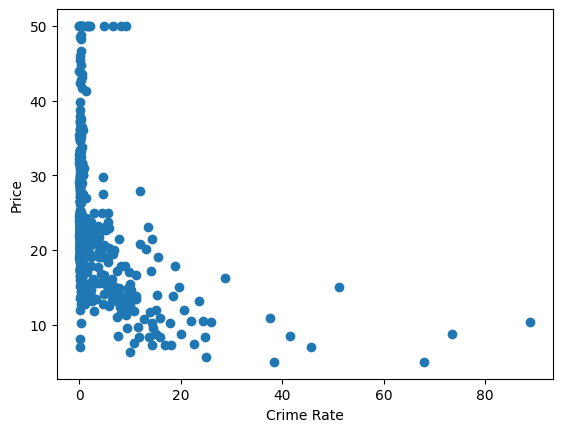

In [18]:
plt.scatter(data['CRIM'], data['MEDV'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

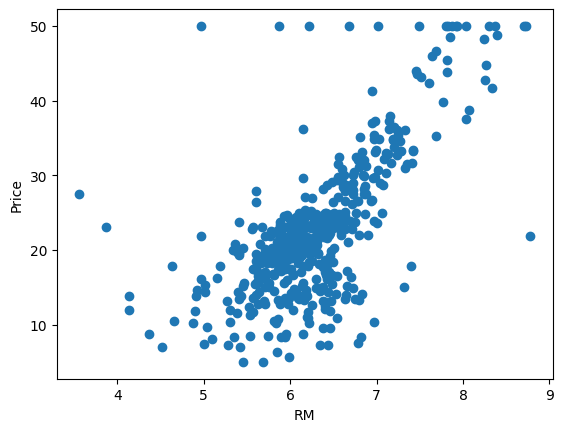

In [19]:
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='MEDV'>

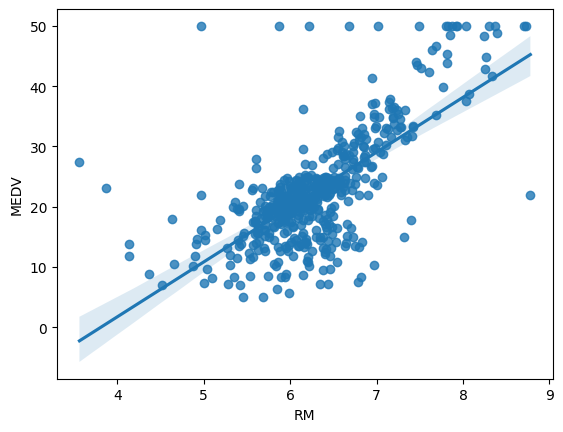

In [20]:
import seaborn as sns
sns.regplot(x='RM', y='MEDV', data=data)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

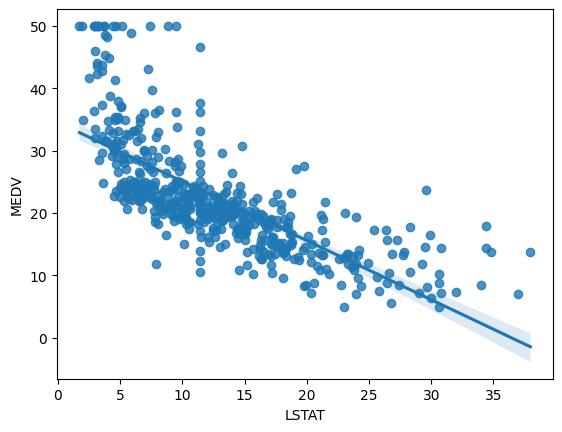

In [21]:
sns.regplot(x='LSTAT', y='MEDV', data=data)

<Axes: xlabel='CHAS', ylabel='MEDV'>

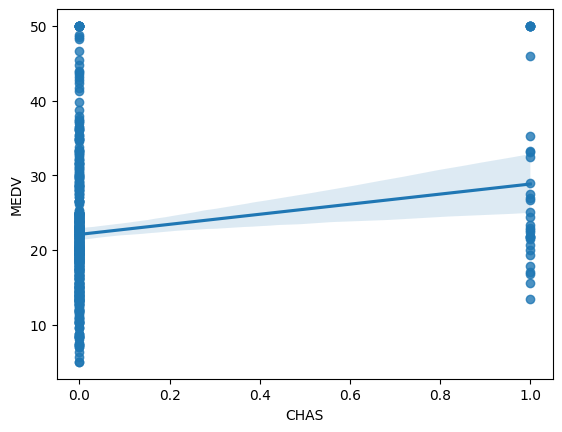

In [22]:
sns.regplot(x='CHAS', y='MEDV', data=data)

In [23]:
# Independent and dependent features
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [24]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43


In [25]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
print(regression.coef_)

[-1.03139352  0.68235072 -0.05344167  0.95797829 -1.61846531  3.14830411
 -0.65443065 -2.98754714  1.64431524 -1.17863385 -2.00667634  1.00071526
 -3.34283682]


In [30]:
print(regression.intercept_)

23.01581920903955


In [31]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
### Prediction with test data
reg_pred=regression.predict(X_test)

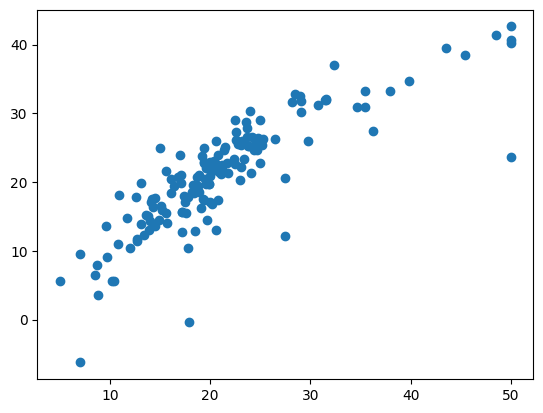

In [33]:
## Plot a scatter plot
plt.scatter(y_test, reg_pred)

In [34]:
## Residuals 
residuals = y_test - reg_pred

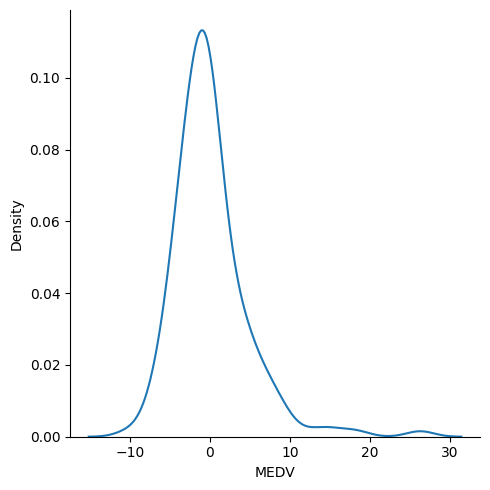

In [35]:
sns.displot(residuals, kind='kde')

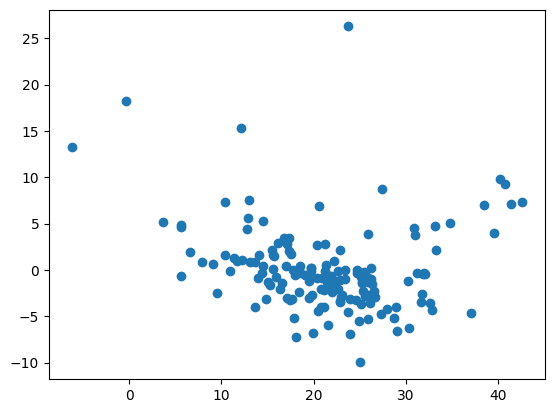

In [36]:
plt.scatter(reg_pred, residuals)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.140754511984167
21.78436075879116
4.667371932768071


## R square and adjusted R square

Formula:

R^2 = 1 - SSR/SST

R^2 - coefficient of determination

SSR - sum of squares of residuals

SST - total sum of squares

In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.7076438632327412


Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

n - the number of observation

k - the number of predictor variables

In [39]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6801030677401734

## New Data Prediction

In [40]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [41]:
np.shape(data)

(506, 14)

## Pickling

In [42]:
import pickle

In [43]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [44]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))